In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.datasets import load_iris
data = load_iris()
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df =  pd.DataFrame(data.data, columns= data.feature_names)
# df.columns = data.feature_names
df['result'] = data.target
df.shape

(150, 5)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),result
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [36]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X,y,scoring='accuracy',cv = 5)
print(np.mean(cvs))

0.9666666666666668


In [39]:
# Training model and stuff applying std scaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=98)
print(f"X_train:{X_train.shape}, X_test:{X_test.shape}, y_train:{y_train.shape}, y_test:{y_test.shape}")

X_train:(100, 4), X_test:(50, 4), y_train:(100,), y_test:(50,)


In [42]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [43]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
model.predict(X_test)

array([2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2,
       0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 0,
       2, 2, 0, 0, 1, 1])

0.9


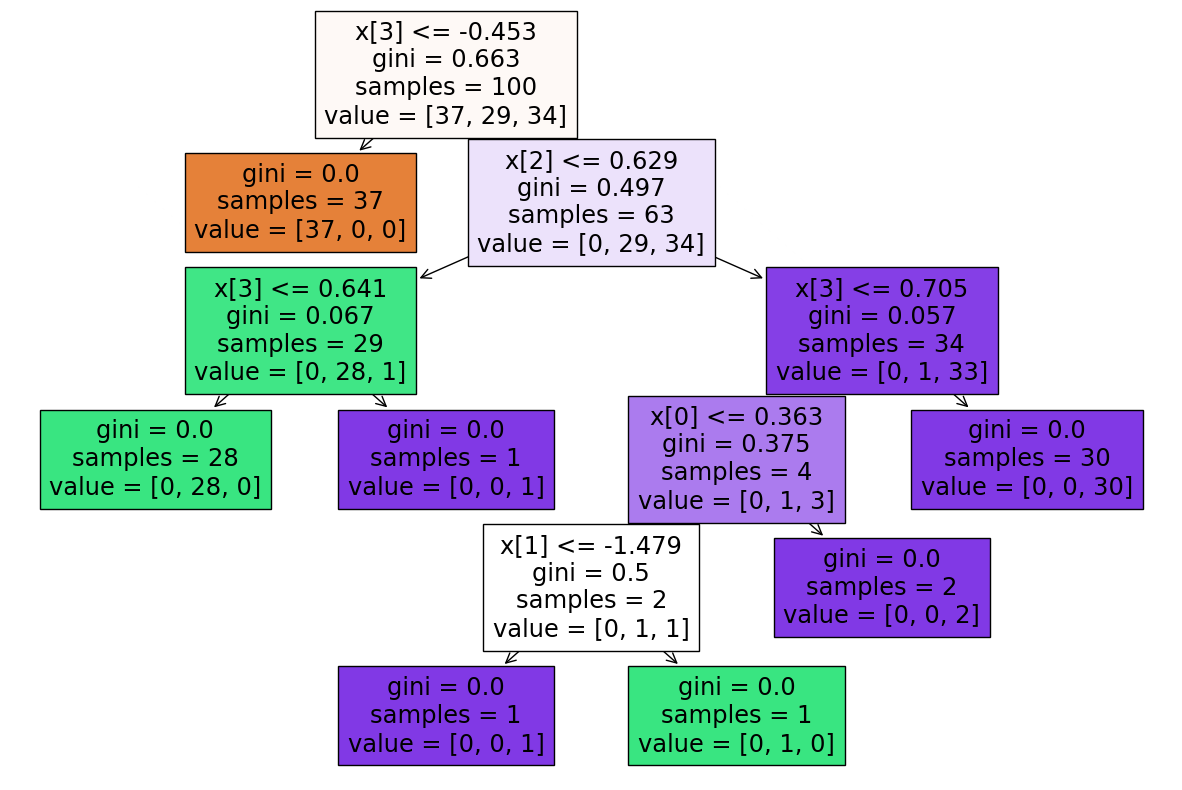

In [49]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)
tree.plot_tree(model.fit(X_train,y_train), filled=  True)
from sklearn.metrics import accuracy_score
ypred = accuracy_score(model.predict(X_test),y_test)
print(ypred)

In [50]:
parameter = {
    'criterion' :['entropy','gini','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
model = DecisionTreeClassifier()

In [51]:
from sklearn.model_selection import GridSearchCV
dmodel = GridSearchCV(model,parameter)

In [60]:
dmodel.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [61]:
dmodel.best_score_

0.97

In [62]:
dmodel.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

In [63]:
dmodel.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [64]:
dmodel.predict(X_test)

array([2, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 0,
       2, 2, 0, 0, 1, 1])

In [65]:
ypred = accuracy_score(dmodel.predict(X_test),y_test)

In [67]:
ypred

0.94

https://www.geeksforgeeks.org/pruning-decision-trees/